In [1]:
import tensorflow as tf
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

Found 24991 files belonging to 2 classes.


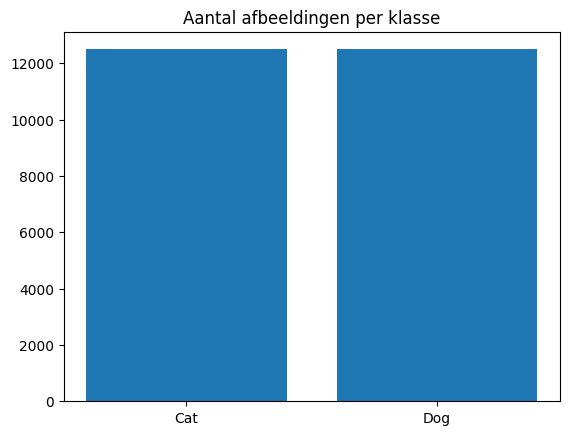

In [3]:
cat_count = len(os.listdir("train/Cat"))
dog_count = len(os.listdir("train/Dog"))
cat_count, dog_count

plt.bar(["Cat", "Dog"], [cat_count, dog_count])
plt.title("Aantal afbeeldingen per klasse")
plt.show()

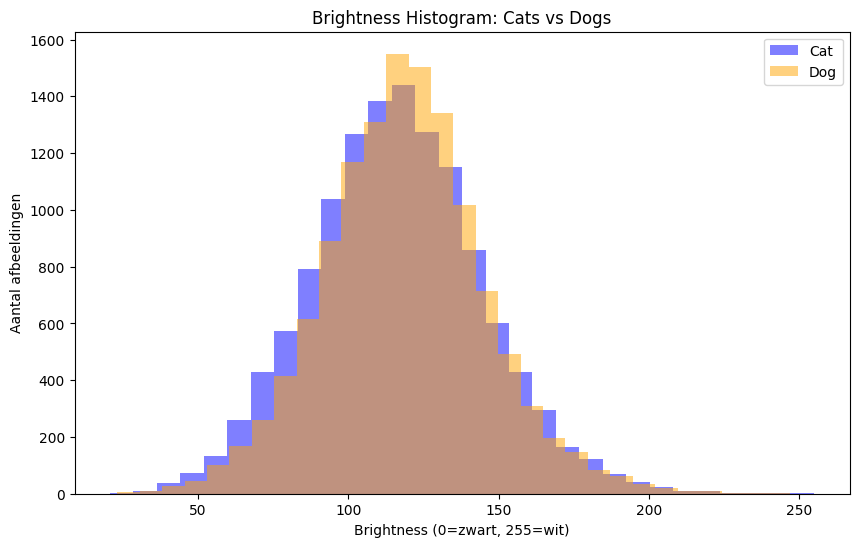

In [ ]:
# laat zien waar de afbeeldingen staan
folders = {
    "Cat": "train/Cat",
    "Dog": "train/Dog"
}

# lege lijst waar de helderheid word opgeslagen
brightness_data = {
    "Cat": [],
    "Dog": []
}

# opent afbeelding en zet om in grijswaarden (L betekent greyscaling)
# maakt een numpy array aan en berekent de gemiddelde helderheid
def get_brightness(img_path):
    img = Image.open(img_path).convert('L')
    arr = np.array(img)
    return arr.mean()

# loopt door alle bestanden heen in de juiste map 
# berekent de helderheid en slaat deze op in de juiste lijst
for label, folder in folders.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            brightness = get_brightness(file_path)
            brightness_data[label].append(brightness)
        except Exception as e:
            print(f"Fout bij {file_path}: {e}")

# de helderheid van katten in het blauw en honden in het oranje
# verdeeld 0-255 in 30 stukken
# alpha zorgt dat het een beetje doorzichtig is zodat je de overlappingen kan zien
# titels en labels toevoegen voor duidelijkheid
plt.figure(figsize=(10,6))
plt.hist(brightness_data["Cat"], bins=30, alpha=0.5, label="Cat", color='blue')
plt.hist(brightness_data["Dog"], bins=30, alpha=0.5, label="Dog", color='orange')
plt.xlabel("Brightness (0=zwart, 255=wit)")
plt.ylabel("Aantal afbeeldingen")
plt.title("Brightness Histogram: Cats vs Dogs")
plt.legend()
plt.show()



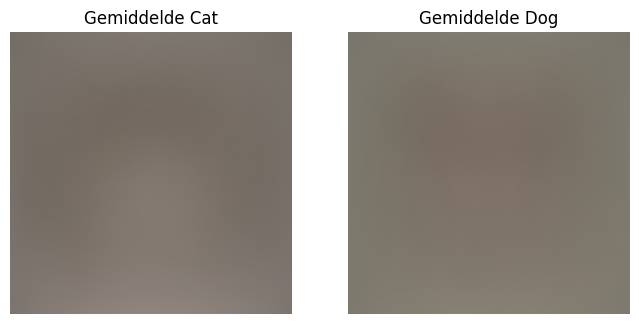

In [ ]:

def average_image(folder):
    imgs = []
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        try:
            img = Image.open(path).convert("RGB").resize((224, 224))
            imgs.append(np.array(img))
        except Exception as e:
            print("Skipping:", path, "Error:", e)
    return np.mean(np.stack(imgs), axis=0).astype(np.uint8)

avg_cat = average_image("train/Cat")
avg_dog = average_image("train/Dog")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Gemiddelde Cat")
plt.imshow(avg_cat)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Gemiddelde Dog")
plt.imshow(avg_dog)
plt.axis("off")

plt.show()


In [4]:
# Definieer de mappen
data_dir = "train"
categories = ["Cat", "Dog"]

print("Controleren op corrupte afbeeldingen...")

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            # Methode 1: Probeer te openen met PIL en te verifiëren
            img = Image.open(file_path)
            img.verify() 
            
            # Methode 2: Probeer de afbeelding echt te decoderen met TensorFlow
            # Dit vangt de specifieke 'Input size mismatch' fouten op
            img_bytes = tf.io.read_file(file_path)
            tf.io.decode_image(img_bytes)
            
        except Exception as e:
            print(f"Verwijderen van corrupt bestand: {file_path} (Fout: {e})")
            # Sluit het bestand eerst als PIL het nog open heeft
            if 'img' in locals(): img.close()
            os.remove(file_path)

print("Check voltooid. Je kunt nu de rest van je code draaien.")

Controleren op corrupte afbeeldingen...
Verwijderen van corrupt bestand: train\Cat\10404.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP, WebP required. [Op:DecodeImage] name: )
Verwijderen van corrupt bestand: train\Cat\4351.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: )
Verwijderen van corrupt bestand: train\Dog\11233.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: )
Verwijderen van corrupt bestand: train\Dog\11912.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 o

c:\Users\lucfr\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Verwijderen van corrupt bestand: train\Dog\9500.jpg (Fout: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: )
Check voltooid. Je kunt nu de rest van je code draaien.


Found 24991 files belonging to 2 classes.
Using 19993 files for training.
Found 24991 files belonging to 2 classes.
Using 4998 files for validation.


c:\Users\lucfr\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,755,202 (178.36 MB)

 Trainable params: 46,755,202 (178.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 324s 509ms/step - accuracy: 0.5807 - loss: 0.6657 - val_accuracy: 0.6765 - val_loss: 0.5971
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 387ms/step - accuracy: 0.7440 - loss: 0.5161 - val_accuracy: 0.8073 - val_loss: 0.4231
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.8276 - loss: 0.3773 - val_accuracy: 0.8481 - val_loss: 0.3422
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.8733 - loss: 0.2914 - val_accuracy: 0.8569 - val_loss: 0.3320
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 388ms/step - accuracy: 0.9012 - loss: 0.2346 - val_accuracy: 0.8667 - val_loss: 0.3343
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.9237 - loss: 0.1849 - val_accuracy: 0.8647 - val_loss: 0.3415
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.9402 - loss: 0.1470 - val_accuracy: 0.8790 - val_loss: 0.3408
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 244s 390ms/step - accuracy: 0.9554 -

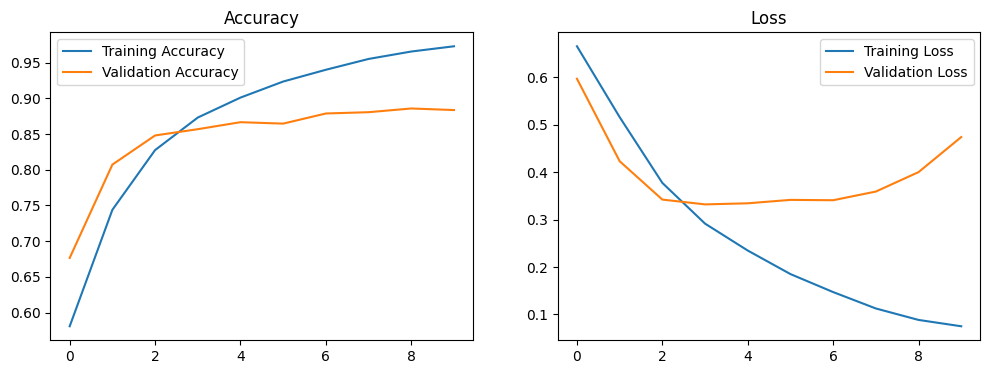

In [6]:

# 1. Data Inladen en Voorbereiden
# We gebruiken de image_size (224, 224) die je al in je EDA gebruikte.
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Validatie set (nodig om overfitting te monitoren)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Optimalisatie voor snelheid
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# 2. AlexNet Model Definitie
def create_alexnet(input_shape, num_classes):
    model = models.Sequential([
        # Rescaling zorgt dat de pixels tussen 0 en 1 komen (belangrijk voor neurale netwerken)
        layers.Rescaling(1./255, input_shape=input_shape),
        
        # Layer 1: Conv + MaxPool
        layers.Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Layer 2: Conv + MaxPool
        layers.Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Layer 3, 4, 5: Conv + Conv + Conv + MaxPool
        layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Flatten naar Dense lagen
        layers.Flatten(),
        
        # Layer 6: Fully Connected + Dropout
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        
        # Layer 7: Fully Connected + Dropout
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        
        # Layer 8: Output (2 klassen: Cat en Dog)
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Model aanmaken
model = create_alexnet(input_shape=(224, 224, 3), num_classes=2)

# 3. Compileren
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 4. Trainen
epochs = 10 # Pas dit aan op basis van je computerkracht
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# 5. Resultaten visualiseren
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

Voorspellingen genereren voor validatieset...


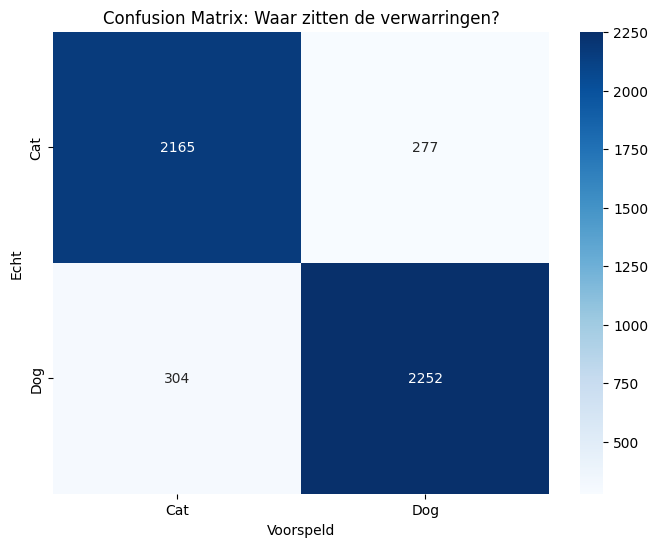

In [13]:
# 1. Handmatig de namen definiëren (omdat val_ds ze door prefetch is 'vergeten')
class_names = ['Cat', 'Dog']

# 2. Verzamel voorspellingen en echte labels
print("Voorspellingen genereren voor validatieset...")
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 3. Bereken de confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Visualisatie met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Voorspeld')
plt.ylabel('Echt')
plt.title('Confusion Matrix: Waar zitten de verwarringen?')
plt.show()

Totaal aantal fouten: 581 van de 4998


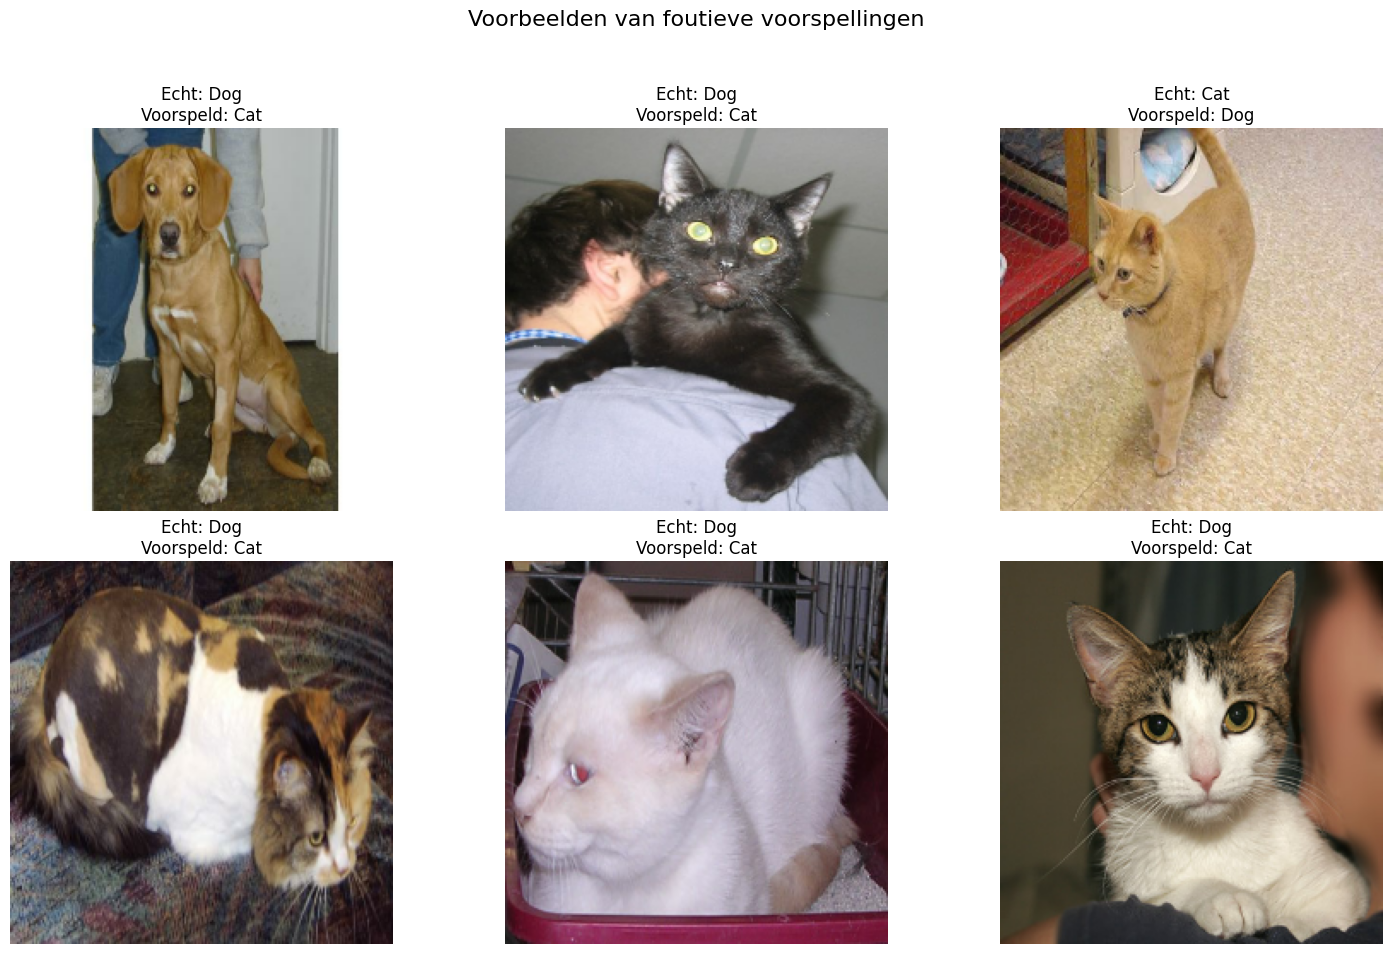

In [11]:
# 1. Identificeer de indexen van de foutieve voorspellingen
misclassified_idx = np.where(y_pred != y_true)[0]
print(f"Totaal aantal fouten: {len(misclassified_idx)} van de {len(y_true)}")

# 2. Kies een aantal willekeurige fouten om te laten zien
num_errors_to_show = 6
if len(misclassified_idx) > 0:
    selected_indices = np.random.choice(misclassified_idx, 
                                        min(len(misclassified_idx), num_errors_to_show), 
                                        replace=False)

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(selected_indices):
        # Zoek de bijbehorende afbeelding in de dataset
        # (We lopen door de dataset tot we bij de juiste index zijn)
        count = 0
        for images, labels in val_ds:
            batch_len = len(images)
            if count + batch_len > idx:
                img = images[idx - count].numpy().astype("uint8")
                true_label = class_names[y_true[idx]]
                pred_label = class_names[y_pred[idx]]
                
                plt.subplot(2, 3, i + 1)
                plt.imshow(img)
                plt.title(f"Echt: {true_label}\nVoorspeld: {pred_label}")
                plt.axis("off")
                break
            count += batch_len
    
    plt.suptitle("Voorbeelden van foutieve voorspellingen", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("Geen fouten gevonden om te tonen!")